# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [8]:
# Get the datasets
# !wget http://huang.eng.unt.edu/CSCE-5218/test.dat
# !wget http://huang.eng.unt.edu/CSCE-5218/train.dat
!curl --output train.dat http://huang.eng.unt.edu/CSCE-5218/train.dat
!curl --output test.dat http://huang.eng.unt.edu/CSCE-5218/test.dat

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11244  100 11244    0     0   477k      0 --:--:-- --:--:-- --:--:--  477k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2844  100  2844    0     0   213k      0 --:--:-- --:--:-- --:--:--  213k


In [9]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [15]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    if len(array1) != len(array2):
        print("Lengths of two arrays do not match", len(array1),'!=', len(array2))
    min_length= min(len(array1), len(array2))
    result = 0
    for i in range(min_length):
        result += array1[i] * array2[i]
    return result


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return 1 / (1 + math.exp(-x))


# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model 
    linear_result = sum(w * x for w, x in zip(weight, instance))
    return sigmoid(linear_result)


# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weight, instance):
    #TODO: return the prediction of the model
    predict_result = output(weight, instance)
    return 1 if predict_result >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weight, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weight, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    # Initialize weights by 0
    weights = [0] * (len(instances[0]))

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            # linear calculation on features
            in_value = dot_product(weights, instance)
            # activation by sigmoid function
            output = sigmoid(in_value)
            # error calculation by difference between the actual output and the target output
            error = instance[-1] - output
            #TODO: name these steps
            # weights update according to perceptron learning rule.
            for i in range(0, len(weights)):
                # The derivative of weights is calculated as the step size of the weights update
                # The derivative of the Sigmoid function is equal to the value of the Sigmoid \
                # function multiplied by 1 minus the value of the Sigmoid function. Because we\
                # need to derivative of weights so we need to multiply the instance[i]. error\
                # is the direction and lr is the step size.
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [16]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)

print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)

We need to train the weights bit by bit to get closer to the accurate prediction model. It \
is trained by looking at the probability value returned by sigmoid. But using the prediction\
 function will return 0 or 1 directly. This cannot be trained.


### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [22]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
        f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  20, lea

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)
1. We do not need all dataset to get the highest accuracy. According to the result, it can get \
the highest accuracy by 50% dataset.
2. With a low learning rate, the model's parameters\ are updated very slowly, which means it\
 takes more iterations for the model to converge to\ 
the optimal solution.


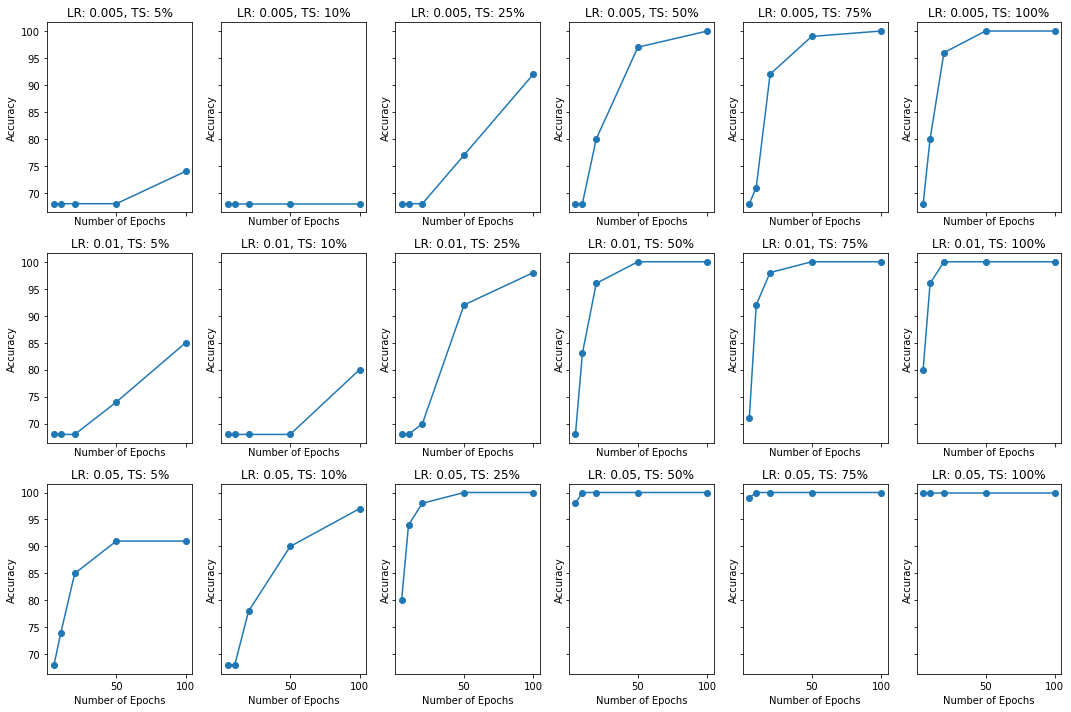

In [21]:
# plot
import matplotlib.pyplot as plt

accuracies = []

for lr in lr_array:
    for tr_size in tr_percent:
        for epochs in num_epochs:
            size = round(len(instances_tr) * tr_size / 100)
            pre_instances = instances_tr[0:size]
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            accuracies.append((lr, tr_size, epochs, accuracy))

lr_values = sorted(set(lr for lr, _, _, _ in accuracies))
tr_size_values = sorted(set(tr_size for _, tr_size, _, _ in accuracies))
epochs_values = sorted(set(epochs for _, _, epochs, _ in accuracies))

fig, axs = plt.subplots(len(lr_values), len(tr_size_values), figsize=(15, 10), sharex=True, sharey=True)

for i, lr_value in enumerate(lr_values):
    for j, tr_size_value in enumerate(tr_size_values):
        accuracies_subset = [(lr, tr_size, epochs, accuracy) for lr, tr_size, epochs, accuracy in accuracies if lr == lr_value and tr_size == tr_size_value]
        epochs_values_subset = [epochs for _, _, epochs, _ in accuracies_subset]
        accuracy_values_subset = [accuracy for _, _, _, accuracy in accuracies_subset]
        axs[i, j].plot(epochs_values_subset, accuracy_values_subset, marker='o')
        axs[i, j].set_title(f"LR: {lr_value}, TS: {tr_size_value}%")
        axs[i, j].set_xlabel("Number of Epochs")
        axs[i, j].set_ylabel("Accuracy")

plt.tight_layout()
plt.show()

3. we can apply regularization techniques to achieve better performance controled by regularization hyperparameters. 

4. No. Training for more epochs can increase the risk of overfitting.
